In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
%matplotlib inline

# hyper-paramters
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True,      # training data
                                           transform=transforms.ToTensor(),
                                           download=True
                                           )

test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False,      # not training data                                           
                                          transform=transforms.ToTensor()  
                                          )

# Data loader (imput pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True
                                           )

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False
                                          )

在train_loader里，总数据分为batch_size=100的N批数据，每个数据的尺寸是（1,28,28）灰度x尺寸
因此，N批中的第i批，i[0]是x，维度为 (100,1,28,28)；
i[1]是y，维度为 (100,1) 


<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


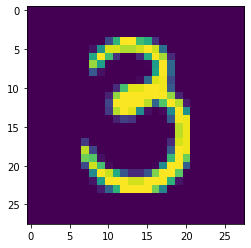

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

# see how the images are
plt.imshow(images[99].numpy().squeeze())

In [ ]:
# logistice regression
# p.s. same as Linear regression model but different loss func
model = nn.Linear(input_size, num_classes) # input 28*28, output 0~9: 10

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train model
# in one epoch, total iteration = batch number (= total data/batch size)
total_step = len(train_loader)  
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape images to (batch_size, input_size) cuz input x should be 1D vec
        images = images.reshape(-1, input_size) # (any, 1*28*28)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2227
Epoch [1/5], Step [200/600], Loss: 2.1744
Epoch [1/5], Step [300/600], Loss: 2.0181
Epoch [1/5], Step [400/600], Loss: 1.9891
Epoch [1/5], Step [500/600], Loss: 1.9127
Epoch [1/5], Step [600/600], Loss: 1.7951
Epoch [2/5], Step [100/600], Loss: 1.7867
Epoch [2/5], Step [200/600], Loss: 1.7028
Epoch [2/5], Step [300/600], Loss: 1.5434
Epoch [2/5], Step [400/600], Loss: 1.5518
Epoch [2/5], Step [500/600], Loss: 1.5591
Epoch [2/5], Step [600/600], Loss: 1.5238
Epoch [3/5], Step [100/600], Loss: 1.4215
Epoch [3/5], Step [200/600], Loss: 1.3254
Epoch [3/5], Step [300/600], Loss: 1.4089
Epoch [3/5], Step [400/600], Loss: 1.2711
Epoch [3/5], Step [500/600], Loss: 1.3304
Epoch [3/5], Step [600/600], Loss: 1.2024
Epoch [4/5], Step [100/600], Loss: 1.2159
Epoch [4/5], Step [200/600], Loss: 1.1285
Epoch [4/5], Step [300/600], Loss: 1.2372
Epoch [4/5], Step [400/600], Loss: 1.1474
Epoch [4/5], Step [500/600], Loss: 1.1692
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Test model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        # print(outputs.data.size())  [100, 10:num_classes]
        _, predict = torch.max(outputs.data, 1)
        
        # one iteration has totally batch size data
        
        total += labels.size(0)
        correct += (predict == labels).sum()

    # coorect is a tensor --> use .item() get int value       
    print('Accuracy of model is {}'.format(correct.item()/total*100))

# save model checkpoint
# torch.save(model.state_dict(), 'model.pkl')

10000 8272
Accuracy of model is 82.72
